Optimal Energy Group Indices: [47 82 17 66 79 89 12 33 93 48  5 43 46 28 20  9 96 97 16 68 50  7 45 80
 56 98 90 32 10 31 11 58 13 78 99 18 24 59 75 42 71  0 34 21 61 30 52 41
 73 49]
Optimal Signal Group Indices: [ 1  2  3  4  6  8 14 15 19 22 23 25 26 27 29 35 36 37 38 39 40 44 51 53
 54 55 57 60 62 63 64 65 67 69 70 72 74 76 77 81 83 84 85 86 87 88 91 92
 94 95]
Optimal SNR: 0.9192364250463142
Optimal Power: 24.24614176792721


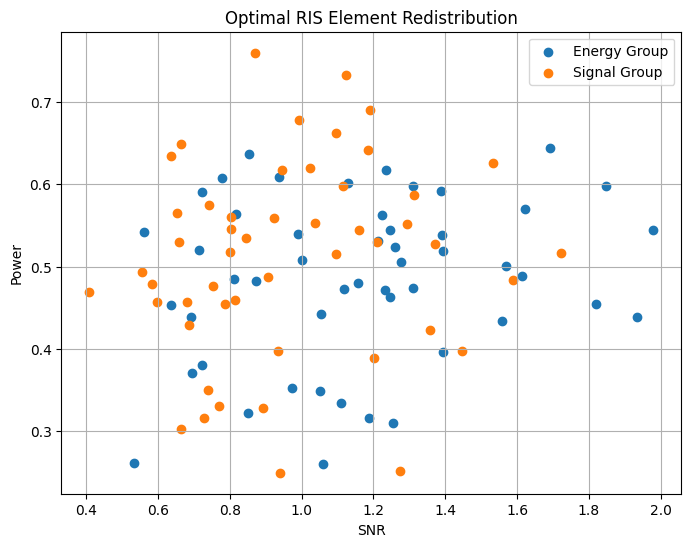

In [642]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 100

elements = np.random.normal(0.5, 0.1, (num_elements, 3))

# Brute-force search for optimal redistribution using random sampling
num_samples = 1000  # Adjust the number of samples based on your computation time
best_snr = float('inf')
best_power = float('inf')
best_energy_indices = None
best_signal_indices = None

for _ in range(num_samples):
    split = np.random.choice(range(num_elements), num_elements // 2, replace=False)
    energy_indices = np.array(split)
    signal_indices = np.array(list(set(range(num_elements)) - set(energy_indices)))
    
    # Calculate SNR and power for the current grouping
    current_snr = np.sum(elements[signal_indices, 0]) / np.sum(elements[signal_indices, 2])
    current_power = np.sum(elements[energy_indices, 1])
    
    if current_snr < best_snr and current_power < best_power:
        best_snr = current_snr
        best_power = current_power
        best_energy_indices = energy_indices
        best_signal_indices = signal_indices 

# Print optimal groupings and their characteristics
print("Optimal Energy Group Indices:", best_energy_indices)
print("Optimal Signal Group Indices:", best_signal_indices)
print("Optimal SNR:", best_snr)
print("Optimal Power:", best_power)

# Visualize the efficiency
plt.figure(figsize=(8, 6))
plt.scatter(elements[best_energy_indices, 0] / elements[best_energy_indices, 2], elements[best_energy_indices, 1], label='Energy Group')
plt.scatter(elements[best_signal_indices, 0] / elements[best_signal_indices, 2], elements[best_signal_indices, 1], label='Signal Group')
plt.xlabel('SNR')
plt.ylabel('Power')
plt.title('Optimal RIS Element Redistribution')
plt.legend()
plt.grid(True)
plt.show()


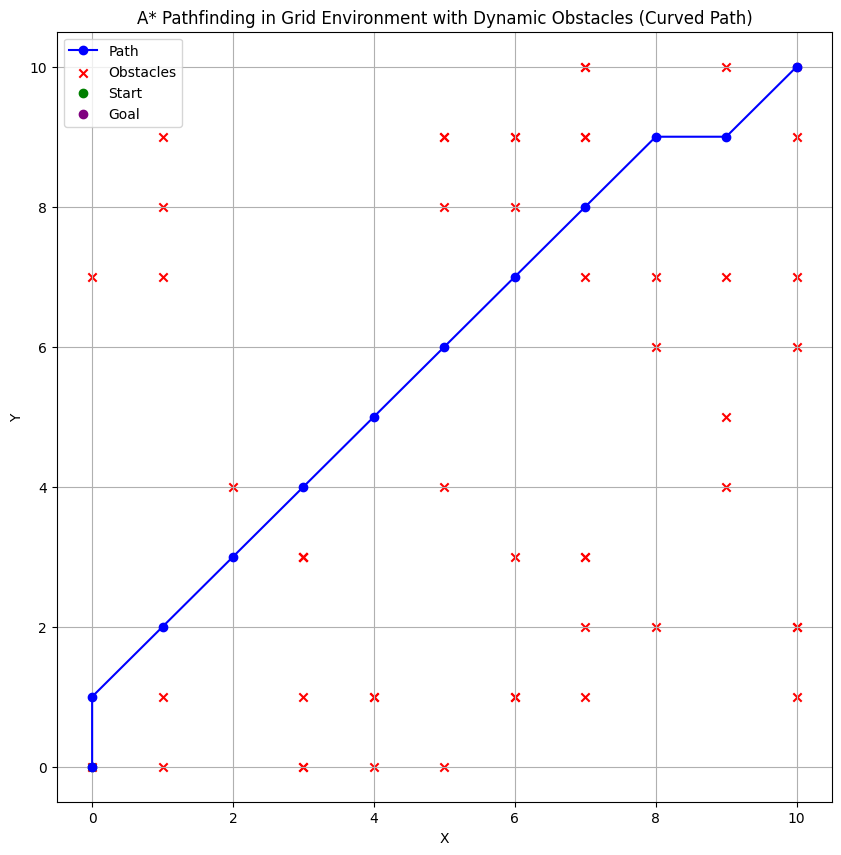

In [653]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, max_iterations=10000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

# Find optimal path using A* pathfinding
path = astar(start, goal, max_iterations=50000)

if path is not None:
    # Visualize the path and obstacles
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in path], [p[1] for p in path], marker='o', linestyle='-', color='blue', label='Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('A* Pathfinding in Grid Environment with Dynamic Obstacles (Curved Path)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Path not found.")

In [643]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

def d_star_lite(start, goal):
    open_list = [(0, goal)]
    came_from = {}
    g_score = {goal: 0}

    while open_list:
        current_g, current = heappop(open_list)
        if current == start:
            path = [start]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, start)
                    heappush(open_list, (f_score, neighbor))

    return None

def bfs(start, goal):
    queue = [start]
    came_from = {}
    visited = set()

    while queue:
        current = queue.pop(0)
        visited.add(current)

        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles and neighbor not in visited:
                queue.append(neighbor)
                came_from[neighbor] = current

    return None

def dijkstra(start, goal):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}

    while open_list:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g
                    heappush(open_list, (f_score, neighbor))

    return None

# Find optimal path using A* pathfinding
path_astar = astar(start, goal, max_iterations=50000)

# Find optimal path using D* Lite
path_d_star_lite = d_star_lite(start, goal)

# Find optimal path using Breadth-First Search
path_bfs = bfs(start, goal)

# Find optimal path using Dijkstra's algorithm
path_dijkstra = dijkstra(start, goal)

# Calculate path lengths
path_lengths = {
    "A*": len(path_astar) if path_astar is not None else float('inf'),
    "D* Lite": len(path_d_star_lite) if path_d_star_lite is not None else float('inf'),
    "BFS": len(path_bfs) if path_bfs is not None else float('inf'),
    "Dijkstra's": len(path_dijkstra) if path_dijkstra is not None else float('inf')
}

# Find the shortest path
best_option = min(path_lengths, key=path_lengths.get)

# Print the best option
print("Best Path Option:", best_option)

# Visualize the paths and obstacles
plt.figure(figsize=(15, 15))

# A* path
if path_astar is not None:
    plt.subplot(2, 2, 1)
    plt.plot([p[0] for p in path_astar], [p[1] for p in path_astar], marker='o', linestyle='-', color='blue', label='A* Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('A* Pathfinding')
    plt.legend()
    plt.grid(True)
else:
    print("A* path not found.")

# D* Lite path
if path_d_star_lite is not None:
    plt.subplot(2, 2, 2)
    plt.plot([p[0] for p in path_d_star_lite], [p[1] for p in path_d_star_lite], marker='o', linestyle='-', color='green', label='D* Lite Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('D* Lite Pathfinding')
    plt.legend()
    plt.grid(True)
else:
    print("D* Lite path not found.")

# Breadth-First Search path
if path_bfs is not None:
    plt.subplot(2, 2, 3)
    plt.plot([p[0] for p in path_bfs], [p[1] for p in path_bfs], marker='o', linestyle='-', color='orange', label='BFS Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Breadth-First Search Pathfinding')
    plt.legend()
    plt.grid(True)
else:
    print("BFS path not found.")

# Dijkstra's path
if path_dijkstra is not None:
    plt.subplot(2, 2, 4)
    plt.plot([p[0] for p in path_dijkstra], [p[1] for p in path_dijkstra], marker='o', linestyle='-', color='red', label="Dijkstra's Path")
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Dijkstra's Algorithm")
    plt.legend()
    plt.grid(True)
else:
    print("Dijkstra's path not found.")

plt.tight_layout()
plt.show()


Best Path Option: A*
A* path not found.
D* Lite path not found.
BFS path not found.
Dijkstra's path not found.


<Figure size 1500x1500 with 0 Axes>

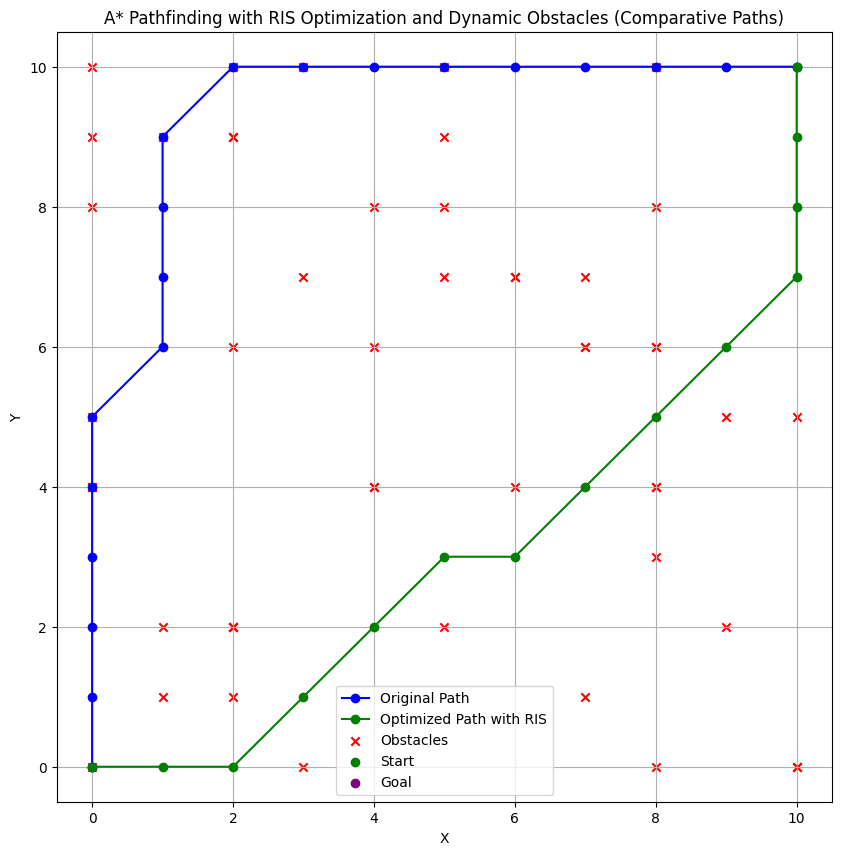

In [644]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Calculate SNR improvement and power reduction for the current element
def calculate_metrics(current, goal, ris_indices):
    # Your calculations for snr_improvement and power_reduction here
    # For now, let's assume they are equal to zero
    snr_improvement = 0
    power_reduction = 0
    return snr_improvement, power_reduction

# Combine metrics with defined weightings
def combined_cost(current, goal, ris_indices):
    pathfinding_cost = heuristic(current, goal)
    snr_improvement, power_reduction = calculate_metrics(current, goal, ris_indices)
    w_pathfinding = 0.5  # Weight for pathfinding cost
    w_snr_improvement = 0.3  # Weight for SNR improvement
    w_power_reduction = 0.2  # Weight for power reduction
    total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
    return total_cost

def astar_with_ris(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + combined_cost(neighbor, goal, best_energy_indices)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

# Find optimal path using A* pathfinding with RIS optimization
path_with_ris = astar_with_ris(start, goal, max_iterations=50000)

if path_with_ris is not None:
    # Visualize the original and optimized paths along with obstacles
    plt.figure(figsize=(10, 10))
    
    # Original A* path
    if path:
     plt.plot([p[0] for p in path], [p[1] for p in path], marker='o', linestyle='-', color='blue', label='Original Path')

    if path_with_ris is not None:
        # Optimized A* path with RIS optimization
        plt.plot([p[0] for p in path_with_ris], [p[1] for p in path_with_ris], marker='o', linestyle='-', color='green', label='Optimized Path with RIS')
        
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('A* Pathfinding with RIS Optimization and Dynamic Obstacles (Comparative Paths)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Path not found.")



In [645]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 100
elements = np.random.normal(0.5, 0.1, (num_elements, 3))

# Brute-force search for optimal redistribution using random sampling
num_samples = 1000  # Adjust the number of samples based on your computation time
best_snr = float('inf')
best_power = float('inf')
best_energy_indices = None
best_signal_indices = None

for _ in range(num_samples):
    split = np.random.choice(range(num_elements), num_elements // 2, replace=False)
    energy_indices = np.array(split)
    signal_indices = np.array(list(set(range(num_elements)) - set(energy_indices)))
    
    # Calculate SNR and power for the current grouping
    current_snr = np.sum(elements[signal_indices, 0]) / np.sum(elements[signal_indices, 2])
    current_power = np.sum(elements[energy_indices, 1])
    
    if current_snr < best_snr and current_power < best_power:
        best_snr = current_snr
        best_power = current_power
        best_energy_indices = energy_indices
        best_signal_indices = signal_indices

# Print optimal groupings and their characteristics
print("Optimal Energy Group Indices:", best_energy_indices)
print("Optimal Signal Group Indices:", best_signal_indices)
print("Optimal SNR:", best_snr)
print("Optimal Power:", best_power)

# A* pathfinding with diagonal movements and RIS optimization
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def calculate_metrics(current, goal, ris_indices):
    # Calculate SNR improvement and power reduction based on RIS optimization
    old_snr = np.sum(elements[current, 0]) / np.sum(elements[current, 2])
    
    ris_elements = elements[ris_indices]
    new_snr = np.sum(ris_elements[:, 0]) / np.sum(ris_elements[:, 2])
    
    snr_improvement = new_snr - old_snr
    
    old_power = np.sum(elements[current, 1])
    new_power = np.sum(ris_elements[:, 1])
    
    power_reduction = old_power - new_power
    
    return snr_improvement, power_reduction

def astar_with_ris(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    snr_improvement, power_reduction = calculate_metrics(neighbor, goal, best_energy_indices)
                    pathfinding_cost = heuristic(neighbor, goal)
                    w_pathfinding = 0.5  # Weight for pathfinding cost
                    w_snr_improvement = 0.3  # Weight for SNR improvement
                    w_power_reduction = 0.2  # Weight for power reduction
                    total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
                    heappush(open_list, (total_cost, neighbor))

        iterations += 1

    return None

# Find optimal path using A* pathfinding with RIS optimization
path_with_ris = astar_with_ris(start, goal, max_iterations=50000)

if path_with_ris is not None:
    # Visualize the original and optimized paths along with obstacles
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in path_with_ris], [p[1] for p in path_with_ris], marker='o', linestyle='-', color='blue', label='Optimized Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Optimal Path Planning with RIS Optimization')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Path not found.")


Optimal Energy Group Indices: [70 50 31 16 84 91 14 74 57 81 82 18 35 79 75 61 56 80 78 54  0 46 71  8
 85 97 26 27 76 60  2 69 37 40 44 59 58 34 15 39  9 23 65 25 19 72 49 63
 89 29]
Optimal Signal Group Indices: [ 1  3  4  5  6  7 10 11 12 13 17 20 21 22 24 28 30 32 33 36 38 41 42 43
 45 47 48 51 52 53 55 62 64 66 67 68 73 77 83 86 87 88 90 92 93 94 95 96
 98 99]
Optimal SNR: 1.026304945383842
Optimal Power: 23.947179102616914
Path not found.
